**Third Iteration: Daily Activity ~ Sleep Duration/Standarized Bedtime(Offset)**

In [1]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns

In [2]:
summer16_raw = pd.read_parquet('data/summer16_raw.parquet')
summer16_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2016-07-12 16:11:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:15,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:30,0,0.0,0.0,0.0,1.59,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:11:45,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
2016-07-12 16:12:00,0,0.0,0.0,0.0,2.50,1.83,1.82,NaN,ACTIVE,summer_160048,summer_16
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-12 17:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16
2016-07-12 17:18:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,summer_160024,summer_16


In [3]:
sala_summer16 = pd.read_parquet('data/summer_2016timing.parquet')
sala_summer16

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,Watch period,DayofWeek,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,summer_160048,2016-07-12,5,NaT,NaN,NaT,NaN,0 days 00:00:00,0 days 00:00:00,0.00,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00
1,summer_160048,2016-07-20,5,2016-07-21 01:39:00,1299.0,2016-07-20 09:16:45,316.0,0 days 06:34:45,0 days 01:02:30,394.75,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-21 02:08:30,2016-07-21 08:15:30,0 days 06:07:00,1568.50,495.50
2,summer_160048,2016-07-22,5,2016-07-23 01:56:45,1316.0,2016-07-22 06:22:15,142.0,0 days 02:59:15,0 days 00:59:30,179.25,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-23 02:20:00,2016-07-23 09:39:15,0 days 07:19:15,1580.00,579.25
3,summer_160048,2016-07-27,5,2016-07-27 11:02:15,422.0,2016-07-27 09:09:15,309.0,0 days 00:42:30,0 days 00:42:30,42.50,...,0 days 00:00:15,2,summer_16Wed,summer_16Weekday,False,2016-07-27 00:00:00,2016-07-27 00:00:00,0 days 00:00:00,0.00,0.00
4,summer_160048,2016-07-25,5,2016-07-26 00:38:00,1238.0,2016-07-25 08:44:45,284.0,0 days 07:04:15,0 days 01:23:45,424.25,...,0 days 00:00:15,0,summer_16Mon,summer_16Weekday,False,2016-07-26 00:53:45,2016-07-26 11:36:45,0 days 10:43:00,1493.75,696.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,summer_160024,2016-07-05,500,2016-07-05 22:25:00,1105.0,2016-07-05 07:51:30,231.0,0 days 01:50:15,0 days 00:26:15,110.25,...,0 days 00:00:15,1,summer_16Tues,summer_16Weekday,False,2016-07-06 01:41:30,2016-07-06 06:18:30,0 days 04:37:00,1541.50,378.50
1090,summer_160024,2016-07-08,500,2016-07-09 03:36:15,1416.0,2016-07-08 10:21:15,381.0,0 days 00:59:30,0 days 00:26:45,59.50,...,0 days 00:00:15,4,summer_16Fri,summer_16Weekday,False,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75
1091,summer_160024,2016-07-02,500,2016-07-03 00:23:30,1223.0,2016-07-02 09:51:30,351.0,0 days 01:41:45,0 days 00:48:45,101.75,...,0 days 00:00:15,5,summer_16Sat,summer_16Weekend/Holiday,True,2016-07-03 02:54:30,2016-07-03 13:36:30,0 days 10:42:00,1614.50,816.50


In [4]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    #total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity#/total_hrs_awake

In [5]:
def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df
#winter0112.Date.array.strftime("%d").astype(int) might be useful for checking if person goes to sleep next day

In [6]:
def completeActivityDataframe(sleep_df, raw):
    useful_columns = ['UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM']
    sleep_df = sleep_df[useful_columns].drop_duplicates() #clean sleep_df
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output


In [7]:
activity_summer16 = completeActivityDataframe(sala_summer16, summer16_raw)
activity_summer16

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,172333
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,0 days 06:02:45,1606.50,529.25,279227
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,0 days 10:02:30,1585.00,747.50,241194
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,0 days 07:21:00,1542.00,543.00,578576
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,0 days 08:49:00,1725.50,814.50,335676
...,...,...,...,...,...,...,...,...,...
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75,199662
1088,summer_160024,2016-07-09,summer_16Weekend/Holiday,2016-07-10 02:25:45,2016-07-10 07:24:15,0 days 04:58:30,1585.75,444.25,281898
1085,summer_160024,2016-07-10,summer_16Weekend/Holiday,2016-07-10 22:48:15,2016-07-11 07:43:00,0 days 08:54:45,1368.25,463.00,216625


In [8]:
activity_summer16[(activity_summer16['Sleep duration']==0) & (activity_summer16['Activity']==0)]

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,


In [9]:
#activity_summer16 = activity_summer16[(activity_summer16['Sleep duration']!=0)&(activity_summer16['Activity']!=0)]
activity_summer16 = activity_summer16[(activity_summer16['Sleep duration']!=0)&(activity_summer16['Activity']!=0)]
activity_summer16

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity
index,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0 days 00:00:00,0.00,0.00,172333
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,0 days 06:02:45,1606.50,529.25,279227
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,0 days 10:02:30,1585.00,747.50,241194
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,0 days 07:21:00,1542.00,543.00,578576
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,0 days 08:49:00,1725.50,814.50,335676
...,...,...,...,...,...,...,...,...,...
1090,summer_160024,2016-07-06,summer_16Weekday,2016-07-07 00:25:30,2016-07-07 06:01:45,0 days 05:36:15,1465.50,361.75,378092
1082,summer_160024,2016-07-07,summer_16Weekday,2016-07-08 02:05:00,2016-07-08 10:14:00,0 days 08:09:00,1565.00,614.00,414589
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,0 days 04:01:45,1667.00,468.75,199662


In [10]:
#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

def sleepDurationToFloat(activity_df):
    activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)
    
def addBedtime(activity_df):
    activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60
    

In [11]:
sleepDurationToFloat(activity_summer16)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_8772/1546753455.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)


In [12]:
addBedtime(activity_summer16)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_8772/1546753455.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60


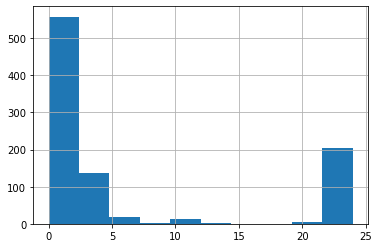

In [13]:
hist = activity_summer16['bedtime'].hist(bins=10)

In [14]:
#find earliest bedtime
activity_summer16[activity_summer16['bedtime']>15].sort_values(by='bedtime').head(10)
#19.233 or 7:14pm

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime
index,,,,,,,,,,
424,summer_160053,2016-07-25,summer_16Weekday,2016-07-25 20:37:15,2016-07-26 06:50:00,10.212500,1237.25,410.00,282571,20.616667
984,summer_160045,2016-06-30,summer_16Weekday,2016-06-30 20:38:15,2016-07-01 04:58:15,8.333333,1238.25,298.25,249263,20.633333
808,summer_160067,2016-07-15,summer_16Weekday,2016-07-15 20:54:45,2016-07-16 07:07:30,10.212500,1254.75,427.50,310680,20.900000
698,summer_160060,2016-07-15,summer_16Weekday,2016-07-15 20:59:00,2016-07-16 04:28:15,7.487500,1259.00,268.25,341794,20.983333
46,summer_160030,2016-06-29,summer_16Weekday,2016-06-29 21:24:15,2016-06-30 06:13:30,8.820833,1284.25,373.50,155848,21.400000
230,summer_160032,2016-06-30,summer_16Weekday,2016-06-30 21:44:45,2016-07-01 05:23:00,7.637500,1304.75,323.00,391400,21.733333
543,summer_160052,2016-07-21,summer_16Weekday,2016-07-21 21:44:45,2016-07-22 06:12:45,8.466667,1304.75,372.75,289506,21.733333
513,summer_160049,2016-07-16,summer_16Weekend/Holiday,2016-07-16 21:46:45,2016-07-17 10:12:00,12.420833,1306.75,612.00,95833,21.766667
239,summer_160032,2016-07-06,summer_16Weekday,2016-07-06 21:51:45,2016-07-07 05:24:15,7.541667,1311.75,324.25,373946,21.850000


In [15]:
#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    earliest_bedtime-=.00001
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"
    
def add_standarize_bedtime(activity_df, earliest_bedtime):
    activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)


In [16]:
add_standarize_bedtime(activity_summer16, 19.23333)

/var/folders/21/3pfj48b93_dfj5qvpfdk7v0h0000gn/T/ipykernel_8772/127815795.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)


In [22]:
activity_summer16

,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime
index,,,,,,,,,,,
0,summer_160048,2016-07-12,summer_16Weekday,2016-07-12 00:00:00,2016-07-12 00:00:00,0.000000,0.00,0.00,172333,0.000000,4.766680
14,summer_160048,2016-07-13,summer_16Weekday,2016-07-14 02:46:30,2016-07-14 08:49:15,6.045833,1606.50,529.25,279227,2.766667,7.533347
9,summer_160048,2016-07-14,summer_16Weekday,2016-07-15 02:25:00,2016-07-15 12:27:30,10.041667,1585.00,747.50,241194,2.416667,7.183347
5,summer_160048,2016-07-15,summer_16Weekday,2016-07-16 01:42:00,2016-07-16 09:03:00,7.350000,1542.00,543.00,578576,1.700000,6.466680
15,summer_160048,2016-07-16,summer_16Weekend/Holiday,2016-07-17 04:45:30,2016-07-17 13:34:30,8.816667,1725.50,814.50,335676,4.750000,9.516680
...,...,...,...,...,...,...,...,...,...,...,...
1090,summer_160024,2016-07-06,summer_16Weekday,2016-07-07 00:25:30,2016-07-07 06:01:45,5.604167,1465.50,361.75,378092,0.416667,5.183347
1082,summer_160024,2016-07-07,summer_16Weekday,2016-07-08 02:05:00,2016-07-08 10:14:00,8.150000,1565.00,614.00,414589,2.083333,6.850013
1093,summer_160024,2016-07-08,summer_16Weekday,2016-07-09 03:47:00,2016-07-09 07:48:45,4.029167,1667.00,468.75,199662,3.783333,8.550013


In [26]:
activity_summer16 = activity_summer16[activity_summer16['Sleep duration']!=0]
activity_summer16 = activity_summer16[(activity_summer16['standarized_bedtime']<14)|((activity_summer16['standarized_bedtime']>16))]

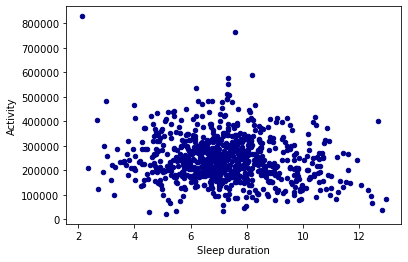

In [27]:
ax1 = activity_summer16.plot.scatter(x='Sleep duration',
                      y='Activity',
                      c='DarkBlue')

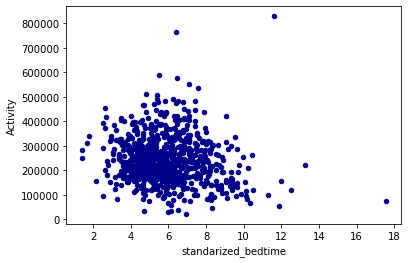

In [28]:
ax1 = activity_summer16.plot.scatter(x='standarized_bedtime',
                      y='Activity',
                      c='DarkBlue')

In [29]:
predictors = ['standarized_bedtime']
X = activity_summer16[predictors]
Y = activity_summer16['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='standarized_bedtime', ylabel='Activity'>

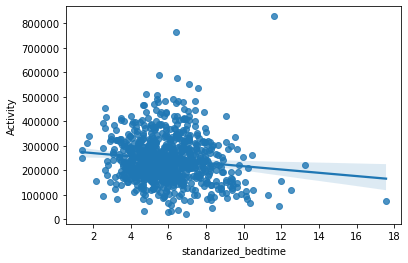

In [32]:
sns.regplot(x='standarized_bedtime', y='Activity', data=activity_summer16)

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     12.65
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           0.000397
Time:                        00:03:23   Log-Likelihood:                -10669.
No. Observations:                 830   AIC:                         2.134e+04
Df Residuals:                     828   BIC:                         2.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.838e+05   1.16e+04     24.544      0.000    2.61e+05    3.06e+05
standarized_bedtime -6703.1864   1884.810     -3.556      0.000   -1.04e+04   -3003.618
==============================================================================
Omnibus:                      193.196   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.914
Skew:                           1.099   Prob(JB):                    5.51e-141
Kurtosis:                       6.721   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""